# Definição do problema

- Base de dados:
  - Input (X): Temperatura
  - Output (Y): Lucro diário em dólares

# Etapa 1: Importação das bibliotecas

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.14.0'

# Etapa 2: Importação da base de dados

In [19]:
# Leitura do arquivo csv
temperatura_df=pd.read_csv("/content/SalesData.csv")
temperatura_df.reset_index(drop=True, inplace=True)#drop=True => Apaga o indice se houver algum indice salvo na variável | inplace=True => Significa que as modificações serão feitas na própria variável temperature

In [5]:
# Visualização de todos os registros
temperatura_df

Temperature     Revenue
0      24.566884  534.799028
1      26.005191  625.190122
2      27.790554  660.632289
3      20.595335  487.706960
4      11.503498  316.240194
..           ...         ...
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

[500 rows x 2 columns]

In [6]:
# Visualização dos 5 primeiros registros
temperatura_df.head(5)

Temperature     Revenue
0    24.566884  534.799028
1    26.005191  625.190122
2    27.790554  660.632289
3    20.595335  487.706960
4    11.503498  316.240194

In [7]:
# Visualização dos 10 últimos registros
temperatura_df.tail(10)

Temperature     Revenue
490    23.824922  584.399945
491    34.472169  809.352519
492    23.056214  552.819351
493    14.931506  377.430928
494    25.112066  571.434257
495    22.274899  524.746364
496    32.893092  755.818399
497    12.588157  306.090719
498    22.362402  566.217304
499    28.957736  655.660388

In [8]:
# Visualização de informações da base de dados
temperatura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [10]:
# Descrição da base de dados
temperatura_df.describe()

Temperature      Revenue
count   500.000000   500.000000
mean     22.232225   521.570777
std       8.096388   175.404751
min       0.000000    10.000000
25%      17.122258   405.558681
50%      22.392791   529.368565
75%      27.740674   642.257922
max      45.000000  1000.000000

# Etapa 3: Visualização da base de dados

<Axes: xlabel='Temperature', ylabel='Revenue'>

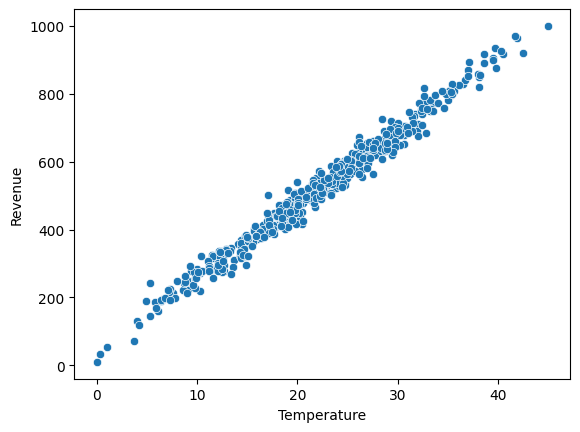

In [11]:
# Scatter plot do Seborn
sns.scatterplot(x=temperatura_df['Temperature'], y=temperatura_df['Revenue'])

# Etapa 4: Criação das variáveis da base de dados

In [24]:
# Criação das variáveis X_train e y_train
x_train=temperatura_df['Temperature']
y_train=temperatura_df['Revenue']

In [25]:
# Formato da variável X_train
x_train.shape

(500,)

In [27]:
# Formato da variável y_train
y_train.shape

(500,)

# Etapa 5: Criação e construção do modelo

In [48]:
# Construção do modelo sequencial
model=tf.keras.Sequential()#This type of model is a simple way to build a neural network where linear layers are added sequentially, one after another.
#Keras is a high-level neural network API
model.add(tf.keras.layers.Dense(units=10, input_shape=[1]))
#model.add(): This method is used to add a layer to a TensorFlow Sequential model.
#tf.keras.layers.Dense(): This function creates a dense (fully connected) layer. A dense layer connects each neuron in one layer to every neuron in the next layer.
#units=1: This parameter specifies the number of neurons (or units) in the dense layer. In this case, there is a single neuron in the layer.
#input_shape=[1]: This parameter defines the shape of the input data expected by this layer


In [49]:
# Sumário do modelo
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
Total params: 20 (80.00 Byte)
Trainable params: 20 (80.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
# Compilar o modelo
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')
#model.compile: This method is used to compile the model before training. It prepares the model for the training process by specifying additional settings necessary for training, such as the optimizer and loss function.
#optimizer=tf.keras.optimizers.Adam(0.5): This parameter sets the optimizer for the training process. In this case, it uses the Adam optimizer with a learning rate of 0.5.
#loss='mean_squared_error': This parameter specifies the loss function used during training. Here, it uses the mean squared error (MSE) as the loss function. MSE is often used in regression problems where the goal is to minimize the squared difference between the predicted and actual values.

In [51]:
# Treinamento
epochs_hist=model.fit(x_train, y_train, epochs=1000)#Commit the training and storage the training infomations

Epoch 1/1000
16/16 [==============================] - 1s 2ms/step - loss: 276698.0312
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 237792.5469
Epoch 3/1000
16/16 [==============================] - 0s 3ms/step - loss: 202155.7656
Epoch 4/1000
16/16 [==============================] - 0s 3ms/step - loss: 170914.7656
Epoch 5/1000
16/16 [==============================] - 0s 3ms/step - loss: 143452.5781
Epoch 6/1000
16/16 [==============================] - 0s 3ms/step - loss: 119816.6953
Epoch 7/1000
16/16 [==============================] - 0s 3ms/step - loss: 99022.2344
Epoch 8/1000
16/16 [==============================] - 0s 3ms/step - loss: 81334.9141
Epoch 9/1000
16/16 [==============================] - 0s 3ms/step - loss: 66342.7578
Epoch 10/1000
16/16 [==============================] - 0s 3ms/step - loss: 53694.7578
Epoch 11/1000
16/16 [==============================] - 0s 4ms/step - loss: 43152.7188
Epoch 12/1000
16/16 [==============================] - 0s

# Etapa 6: Avaliação do modelo

In [32]:
# Visualização do dicionário com os resultados
epochs_hist.history.keys()

dict_keys(['loss'])

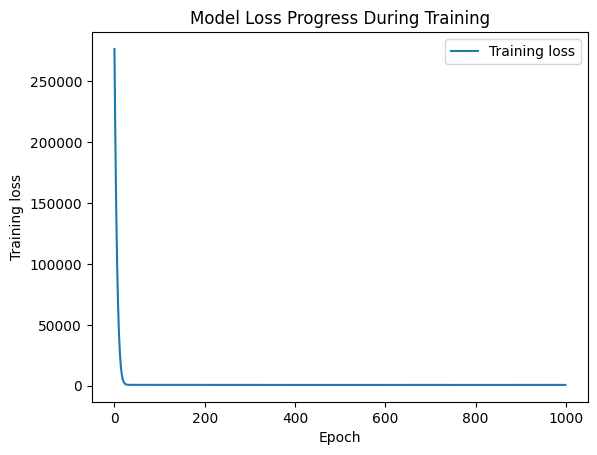

In [52]:
# Gráfico com os resultados da loss function
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training loss')
plt.legend(['Training loss'])

In [34]:
# Visualização dos pesos
model.get_weights()

[array([[21.51328]], dtype=float32), array([44.83975], dtype=float32)]

In [61]:
# Previsões com o modelo treinado, com a temperatura de 5 graus
temp=5
revenue=model.predict([temp])
revenue

1/1 [==============================] - 0s 55ms/step


array([[152.21687, 152.21687, 152.21689, 152.21687, 152.21687, 152.21687,
        152.21687, 152.21687, 152.21689, 152.21689]], dtype=float32)

16/16 [==============================] - 0s 2ms/step


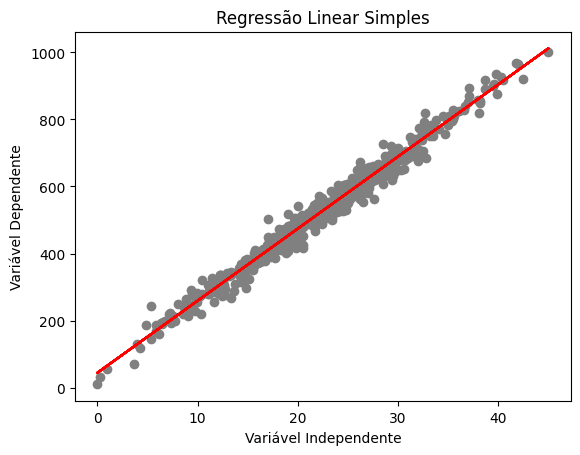

In [53]:
# Gráfico com a reta da regressão linear
plt.scatter(x_train, y_train, label='Dados de Treinamento', color='gray')  # Scatter plot dos dados
plt.plot(x_train, model.predict(x_train), color='red', label='Linha de Regressão')  # Linha de regressão
plt.xlabel('Variável Independente')  # Nome do eixo x
plt.ylabel('Variável Dependente')  # Nome do eixo y
plt.title('Regressão Linear Simples')  # Título do gráfico
plt.show()  # Mostra o gráfico

# Etapa 7: Confirmar os resultados usando sklearn

In [56]:
# Usar o sklearn para obter os mesmos resultados
x_train = x_train.values.reshape(-1,1)#Converts it to a matrix
y_train = y_train.values.reshape(-1,1)#Converts it to a matrix

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [57]:
regressor.coef_

array([[21.44362551]])

In [58]:
regressor.intercept_

array([44.83126709])

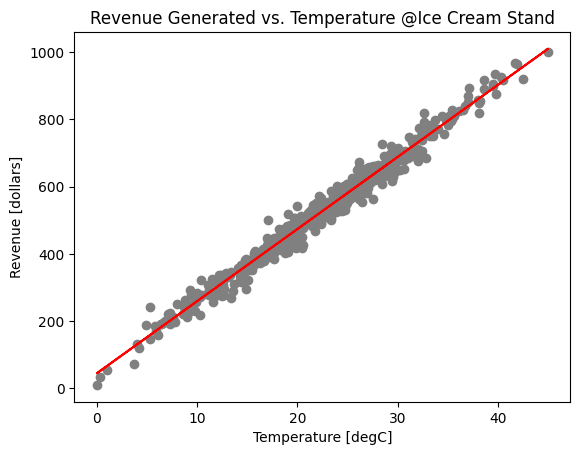

In [59]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, regressor.predict(x_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand');

In [62]:
temp = 5
revenue = regressor.predict([[temp]])
print('Revenue Predictions Using Trained ANN =', revenue)

Revenue Predictions Using Trained ANN = [[152.04939464]]
